# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
#Import Dataset and create a copy
data = pd.read_csv('data1.csv')
df = data.copy()

In [3]:
#Display first five rows
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [4]:
#Drop 'unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [6]:
#Checking number of rows and columns
df.shape

(215909, 9)

In [7]:
#Check data types of all columns
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

In [8]:
#Check summary statistics
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


In [9]:
#Check summary statistics of all columns, including object dataypes
df.describe(include = 'all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,17,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Note:** Looking at the price column, the Mean and Median values are significantly apart which means the data is skewed. The dataset follows the pattern of **Mean > Median** which means that the dataset is **Right/Positive Skewed**.

In [10]:
#Check null values in dataset
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

In [11]:
#Fill the Null values in the 'price' column.
df['price'].fillna(df['price'].mean(), inplace = True)

In [12]:
#Drop the rows containing Null values in the attributes train_class and fare
df.dropna(subset=['train_class','fare'], inplace = True)

In [13]:
#Drop 'insert_date'
df.drop('insert_date', axis=1, inplace = True)

In [14]:
#Check null values again in dataset
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

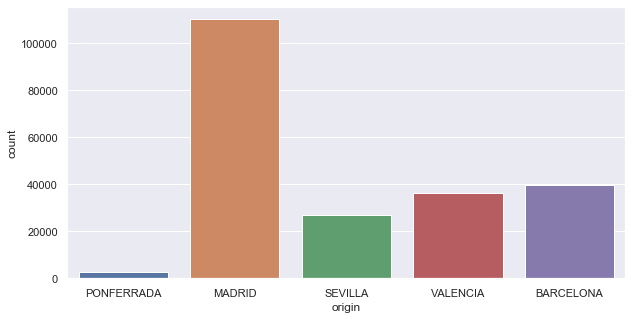

In [15]:
#Plot number of people boarding from different stations
plt.figure(figsize = (10,5));
sns.countplot(x = 'origin', data = df);

**Note:** The number of people boarding the train at the origin stations in **descending** order is as follows:
                1. MADRID (most people boarding at this station)
                2. BARCELONA
                3. VALENCIA
                4. SEVILLA
                5. PONFERRADA (least people boarding at this station)

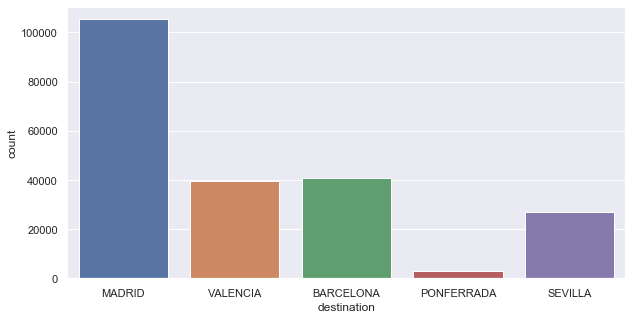

In [16]:
#Plot number of people for the destination stations
plt.figure(figsize = (10,5));
sns.countplot(x = 'destination' , data = df);

**Note:** The number of people exiting the train at the destination stations in **descending** order is as follows:
                1. MADRID (most people exiting at this station)
                2. BARCELONA
                3. VALENCIA
                4. SEVILLA
                5. PONFERRADA (least people exiting at this station)

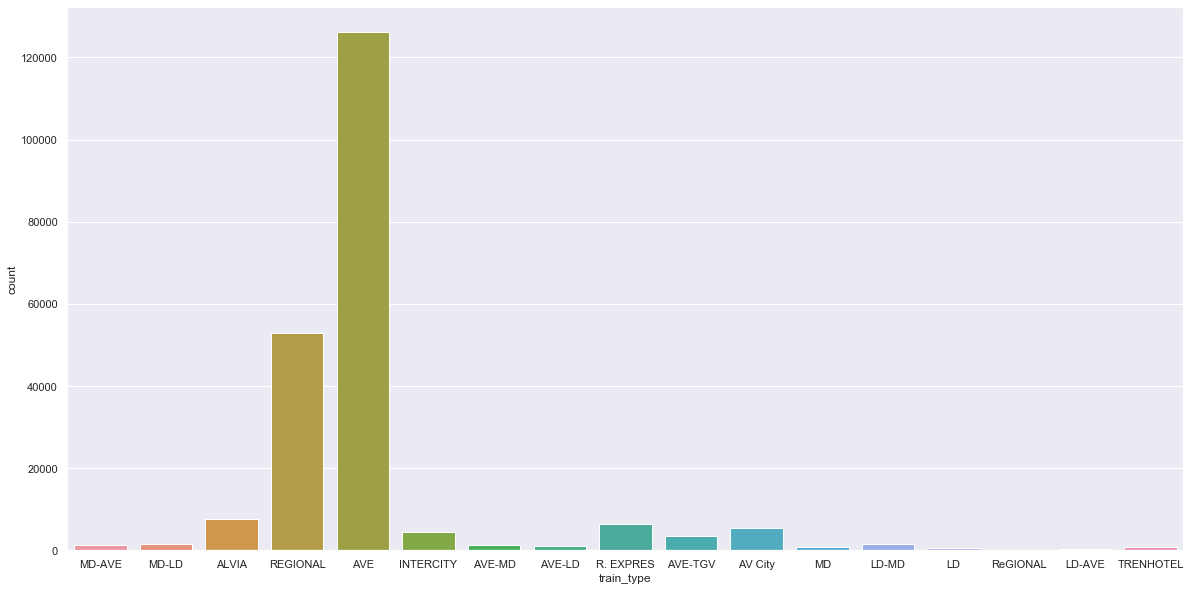

In [17]:
#Display different types of train that runs in Spain
plt.figure(figsize = (20,10));
sns.countplot(x = 'train_type' , data = df);

**Note:** The train type **AVE** runs the maximum in number among all train types.


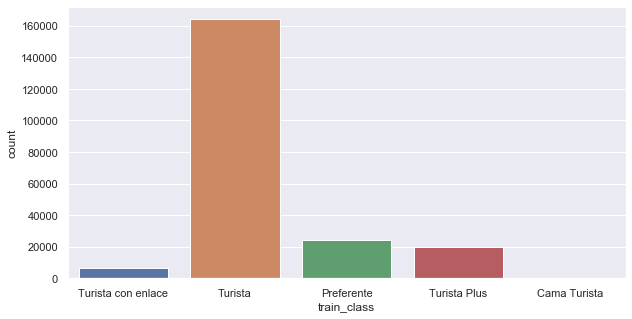

In [18]:
#Plot number of trains of different class
plt.figure(figsize = (10,5));
sns.countplot(x = 'train_class', data = df);

**Note:** The most commonly used train class in general is the **Turista** class.

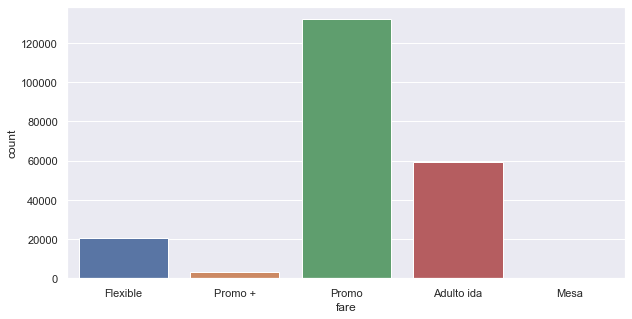

In [19]:
#Plot number of tickets bought from each category
plt.figure(figsize = (10,5));
sns.countplot(x = 'fare', data = df);

**Note:** The most commonly bought tickets were of **Promo** ticket category.

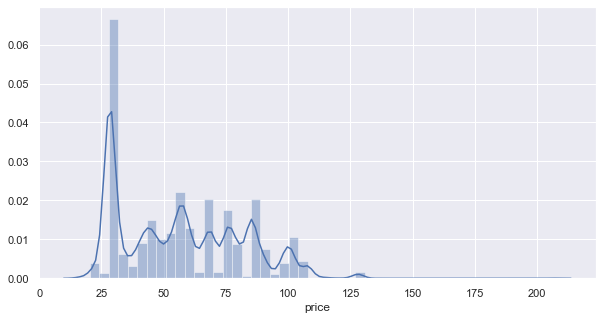

In [20]:
#Plot distribution of the ticket prices
plt.figure(figsize = (10,5));
sns.distplot(df['price']);

**Note:** The nature of the price dataset is **Right/Positive Skewed**, because the Mean > Median and some extreme outlier values are present i.e. price values > 100, due to which the data is skewed. The most common ticket price is approximately 30.

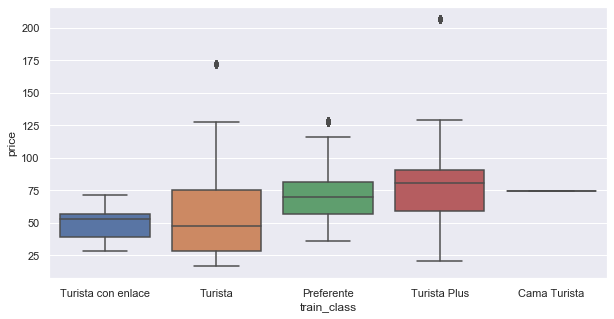

In [21]:
#Show train_class vs price through boxplot
plt.figure(figsize = (10,5));
sns.boxplot(x = 'train_class' , y = 'price' , data = df);

**Note:** The price for the different ticket categories in **descending** order, according to median ticket prices, are as follows:
                1. Turista Plus (most expensive)
                2. Cama Turista
                3. Preferente
                4. Turista con enlace
                5. Turista (least expensive)

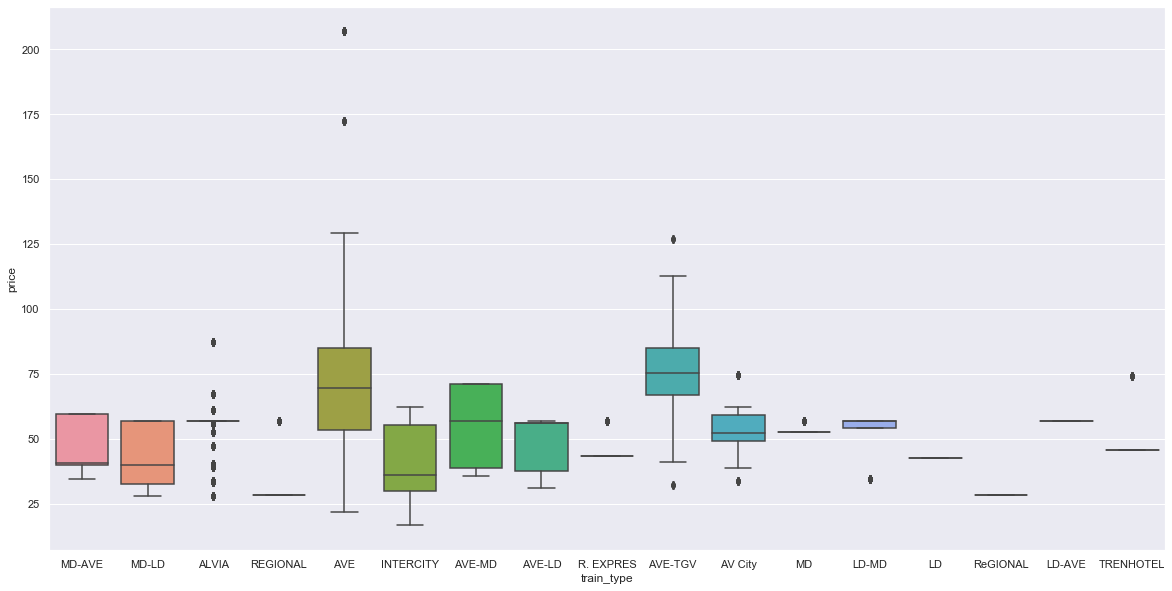

In [22]:
#Show train_type vs price through boxplot
plt.figure(figsize = (20,10));
sns.boxplot(x = 'train_type' , y = 'price' , data = df);

**Note:** The 2 most costly trains according to median ticket prices, are as follows:
                1. AVE-TGV (outlier values indicate ticket prices greater than 125 in some cases)
                2. AVE (outlier values indicate ticket prices greater than 200 in some cases)

## Feature Engineering


In [23]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [24]:
import datetime

In [25]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [26]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

In [27]:
df.head(2)

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,4.7
1,1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,5.8


### Removing redundant features


In [28]:
#Removing features that are giving the related values as 'travel_time_in_hrs'
df.drop(['start_date', 'end_date'], axis = 1, inplace = True)

We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

In [29]:
#Findout people travelling from MADRID to SEVILLA
df1 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'SEVILLA')]

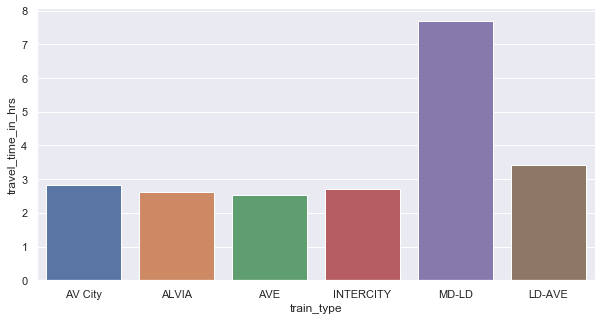

In [30]:
#Making a plot for finding out travelling hours for each train type
plt.figure(figsize = (10,5));
sns.barplot(x = 'train_type', y = 'travel_time_in_hrs', data = df1);

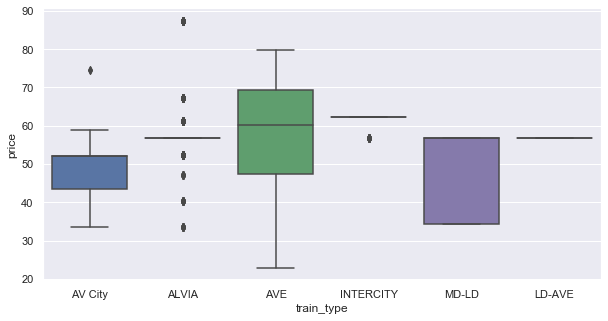

In [31]:
#Show train_type vs price through boxplot
plt.figure(figsize = (10,5));
sns.boxplot(x = 'train_type', y = 'price', data = df1);

## **Travelling from MADRID to BARCELONA**


In [32]:
#Findout people travelling from MADRID to BARCELONA
df1 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'BARCELONA')]

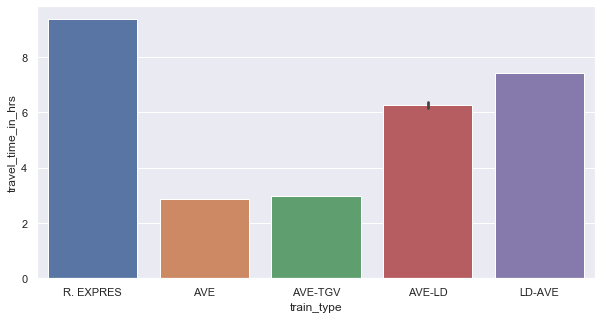

In [33]:
#Making a plot for finding out travelling hours for each train type
plt.figure(figsize = (10,5));
sns.barplot(x = 'train_type', y = 'travel_time_in_hrs', data = df1);

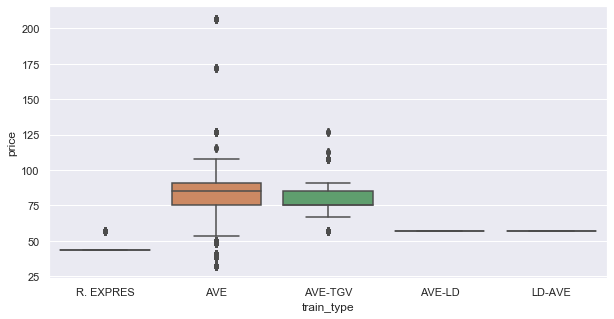

In [34]:
#Show train_type vs price through boxplot
plt.figure(figsize = (10,5));
sns.boxplot(x = 'train_type', y = 'price', data = df1);

## **Travelling from MADRID to VALENCIA**

In [35]:
#Findout people travelling from MADRID to VALENCIA
df1 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'VALENCIA')]

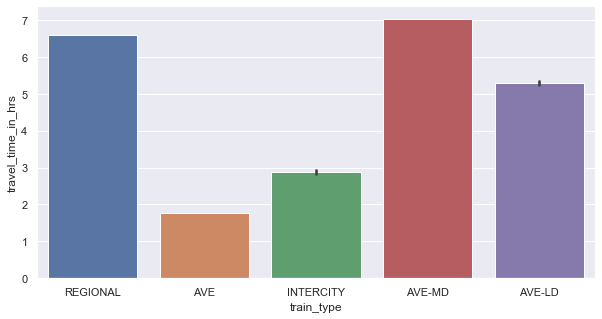

In [36]:
#Making a plot for finding out travelling hours for each train type
plt.figure(figsize = (10,5));
sns.barplot(x = 'train_type', y = 'travel_time_in_hrs', data = df1);

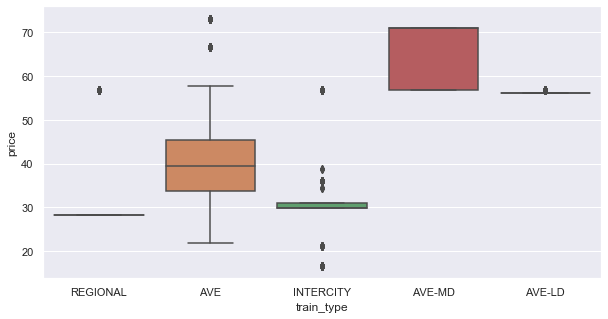

In [37]:
#Show train_type vs price through boxplot
plt.figure(figsize = (10,5));
sns.boxplot(x = 'train_type', y = 'price', data = df1);

## **Travelling from MADRID to PONFERRADA**

In [38]:
#Findout people travelling from MADRID to PONFERRADA
df1 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'PONFERRADA')]

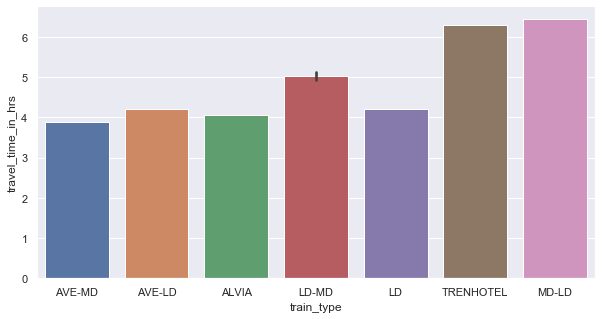

In [39]:
#Making a plot for finding out travelling hours for each train type
plt.figure(figsize = (10,5));
sns.barplot(x = 'train_type', y = 'travel_time_in_hrs', data = df1);

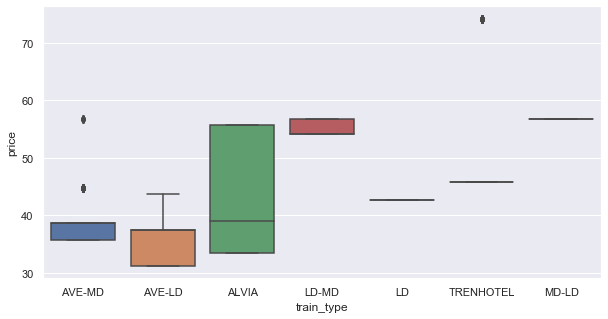

In [40]:
#Show train_type vs price through boxplot
plt.figure(figsize = (10,5));
sns.boxplot(x = 'train_type', y = 'price', data = df1);

# Applying Linear  Regression

In [41]:
#Import LabelEncoder library from sklearn 
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [42]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [43]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333


In [45]:
#Separating the dependent and independent variables
X = df.drop(['index','price'], axis = 1)
Y = df[['price']]
print(X.shape)
print(Y.shape)

(215266, 6)
(215266, 1)


In [46]:
#Import test_train_split from sklearn
from sklearn.model_selection import train_test_split

In [47]:
#Split the data into training and test set
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(150686, 6) (150686, 1)
(64580, 6) (64580, 1)


In [48]:
#Import LinearRegression library from sklearn
from sklearn.linear_model import LinearRegression

**Make an object of LinearRegression( ) and train it using the training data set**

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train, Y_train)

LinearRegression()

In [52]:
#Find out the predictions using training data set.
lr_predict_train = lr.predict(X_train)

In [51]:
#Find out the predictions using test data set
lr_predict = lr.predict(X_test)

In [53]:
#Import r2_score library form sklearn
from sklearn.metrics import r2_score

In [55]:
#Find out the R2 Score for training data and print it.
lr_r2_train = r2_score(Y_train, lr_predict_train)
lr_r2_train

0.7273691035438269

In [54]:
#Find out the R2 Score for test data and print it.
lr_r2_test= r2_score(Y_test, lr_predict)
lr_r2_test

0.7240844867558631

**Comparing training and testing R2 scores**

In [56]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Training Data is:  0.7273691035438269
R2 score for Linear Regression Testing Data is:  0.7240844867558631


# Applying Polynomial Regression

In [57]:
#Import PolynomialFeatures from sklearn
from sklearn.preprocessing import PolynomialFeatures

In [58]:
#Make an object of default Polynomial Features
poly_reg = PolynomialFeatures(degree = 2)

In [59]:
#Transform the features to higher degree features.
X_train_poly , X_test_poly = poly_reg.fit_transform(X_train) , poly_reg.fit_transform(X_test)

In [60]:
#Fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression()

In [61]:
#Find the predictions on the data set
y_train_predicted , y_test_predict = poly_model.predict(X_train_poly) , poly_model.predict(X_test_poly)

### Evaluating R2 score

In [62]:
#Evaluate R2 score for training data set
r2_train = r2_score(Y_train , y_train_predicted)
r2_train

0.8214907333897186

In [63]:
#Evaluate R2 score for test data set
r2_test = r2_score(Y_test , y_test_predict)
r2_test

0.8177058761297118

**Comparing training and testing R2 scores**

In [64]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8214907333897186
The r2 score for testing set is:  0.8177058761297118


## Selecting the best model

In [65]:
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly , X_tst_poly = poly_reg.fit_transform(X_train) , poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted , y_tst_predict = poly.predict(X_tr_poly) , poly.predict(X_tst_poly)
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.7273691035438268, 0.8214907333897186, 0.8461511793030929, 0.8641353508483028, 0.8701812459554414]
R2 Test [0.7240844867558636, 0.8177058761297118, 0.8425583287022773, -0.9978287309711762, -1274687.0076593473]


#### Plotting the model

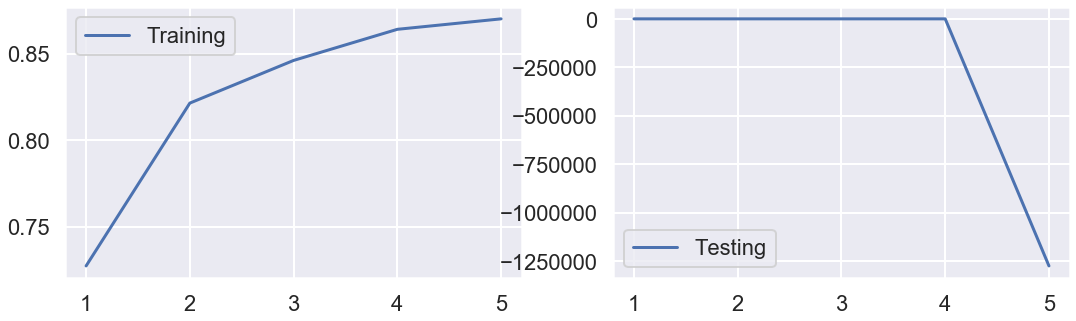

In [66]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Note:** According to the r2 score of the testing data upto degree 5, the r2 score shows increase uptill degree 3. At degree 4 the r2 score decreases to -1.1 and at degree 5 the r2 score value decreases to -990000. This shows that the model is not learning anything useful from the features at this point as they have become way too complex. **The best result is given by the model uptill degree 3 where it shows r2 score of 0.8425676757763954 which is the highest score**. At this configuration the model is able to predict prices quite accurately.